In [20]:
#　まずライブラリーをインストール
#　pip install beautifulsoup4 ,jpholiday ,japanize_matplotlib

In [21]:
'''
GoogleColaboratoryで気象庁の過去気象データをスクレイピングしてみた。@Cyber_Hacnosuke
https://qiita.com/Cyber_Hacnosuke/items/122cec35d299c4d01f10
を参考にしました
気象庁　過去の気象データ検索　
http://www.data.jma.go.jp/obd/stats/etrn/index.php?prec_no=&block_no=&year=&month=&day=&view=
こちらから対象地点のprec_no＝**　　block_no＝*****　を探します
'''

place_codeA = 51
place_codeB = 1638
place_name = "大府"

import requests
from bs4 import BeautifulSoup 
import csv

# URLで年と月ごとの設定ができるので%sで指定した英数字を埋め込めるようにします。
base_url = "http://www.data.jma.go.jp/obd/stats/etrn/view/daily_a1.php?prec_no=51&block_no=1638&year=%s&month=%s&day=&view=p1"

#取ったデータをfloat型に変えるやつ。(データが取れなかったとき気象庁は"/"を埋め込んでいるから0変える)
def str2float(str):
  try:
    return float(str)
  except:
    return 0.0


In [22]:
Header = ['年月日','降水量(mm)', '平均気温(℃)','最高気温(℃)', '最低気温(℃)','平均風速(m/s)', '日照時間(h)']
All_list = [Header]


In [23]:
year=2020
for month in range(1,13):
        #urlに年と月を当てはめる。
        r = requests.get(base_url%(year, month))
        r.encoding = r.apparent_encoding
        # まずはサイトごとスクレイピング
        soup = BeautifulSoup(r.text)
        # findAllで条件に一致するものをすべて抜き出します。
        # 今回の条件はtrタグでclassがmtxになってるものです。
        rows = soup.findAll('tr',class_='mtx')
        
        # 表の最初の1~3行目はカラム情報なのでスライスする。(indexだから初めは0だよ)
        rows = rows[3:]
        # 観測地点により要素数が異なります。
        #気圧の観測のある地点は4行目までカラム情報なのでrows=row[4:]
       
        # 1日〜最終日までの１行を網羅し、取得します。
        for row in rows:
          # 今度はtrのなかのtdをすべて抜き出します
          data = row.findAll('td')

          #１行の中には様々なデータがあるので全部取り出す。
          # ★ポイント 取り出したい要素がdataの何番目かを調べます
    
          rowData = [] #初期化
          rowData.append(str(year) + "/" + str(month) + "/" + str(data[0].string))
          rowData.append(str2float(data[1].string))#降水量(mm)　element１
          rowData.append(str2float(data[4].string))#平均気温(℃) element2
          rowData.append(str2float(data[5].string))#最高気温(℃) elemeny3
          rowData.append(str2float(data[6].string))#最低気温(℃) element4
          rowData.append(str2float(data[7].string))#平均風速(m/s) element5
          rowData.append(str2float(data[13].string))#日照時間(h) element6


          #次の行にデータを追加
          All_list.append(rowData)
All_list[:10]

[['年月日', '降水量(mm)', '平均気温(℃)', '最高気温(℃)', '最低気温(℃)', '平均風速(m/s)', '日照時間(h)'],
 ['2020/1/1', 0.0, 5.2, 9.6, 0.5, 2.2, 6.8],
 ['2020/1/2', 0.0, 7.8, 11.3, 4.4, 2.2, 3.7],
 ['2020/1/3', 0.0, 7.8, 12.3, 2.8, 1.6, 5.9],
 ['2020/1/4', 0.0, 8.3, 11.6, 6.0, 2.3, 3.2],
 ['2020/1/5', 0.0, 6.4, 9.0, 4.8, 4.0, 9.0],
 ['2020/1/6', 0.0, 6.7, 11.2, 0.3, 2.3, 7.0],
 ['2020/1/7', 6.0, 5.6, 8.4, 1.9, 1.3, 0.5],
 ['2020/1/8', 19.0, 11.2, 18.2, 6.9, 3.8, 4.0],
 ['2020/1/9', 0.5, 10.0, 13.1, 7.1, 3.6, 8.5]]

In [24]:
    #csvファイル形式で保存。名前は都市名
    with open(place_name + '.csv', 'w',encoding="utf-8") as file:
      writer = csv.writer(file, lineterminator='\n')
      writer.writerows(All_list)

In [25]:
'''
【Python】カレンダー形式のヒートマップ(祝日表示つき)@yuto16
https://qiita.com/yuto16/items/06a804df543ccd0d0364
を参考にしました

'''
import numpy as np
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize
import datetime
import jpholiday

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.patches as patches #長方形の描画

In [26]:
df = pd.read_csv(place_name + '.csv')#csvファイルを開く
df.head()

,年月日,降水量(mm),平均気温(℃),最高気温(℃),最低気温(℃),平均風速(m/s),日照時間(h)
0,2020/1/1,0.0,5.2,9.6,0.5,2.2,6.8
1,2020/1/2,0.0,7.8,11.3,4.4,2.2,3.7
2,2020/1/3,0.0,7.8,12.3,2.8,1.6,5.9
3,2020/1/4,0.0,8.3,11.6,6.0,2.3,3.2
4,2020/1/5,0.0,6.4,9.0,4.8,4.0,9.0


In [27]:
df["date"] = pd.to_datetime(df["年月日"], format='%Y-%m-%d')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.head()

,年月日,降水量(mm),平均気温(℃),最高気温(℃),最低気温(℃),平均風速(m/s),日照時間(h),date,year,month,day
0,2020/1/1,0.0,5.2,9.6,0.5,2.2,6.8,2020-01-01,2020,1,1
1,2020/1/2,0.0,7.8,11.3,4.4,2.2,3.7,2020-01-02,2020,1,2
2,2020/1/3,0.0,7.8,12.3,2.8,1.6,5.9,2020-01-03,2020,1,3
3,2020/1/4,0.0,8.3,11.6,6.0,2.3,3.2,2020-01-04,2020,1,4
4,2020/1/5,0.0,6.4,9.0,4.8,4.0,9.0,2020-01-05,2020,1,5


In [28]:
def american_calendar(year, month, day):
    #入力年のdatetime.date型データを作成
    inp = datetime.date(year=year, month=month, day=day)
    #入力年の元日のdatetime.date型データを作成
    first = datetime.date(year=year, month=1, day=1)

    #まず曜日の計算
    inp_how = (inp.weekday()+1) % 7 #+1は曜日を日曜始まりに変更するため
    first_how = (first.weekday()+1)%7

    #以下, 週番号の計算
    #カレンダーの左上(最初の日曜日)の日付を取得
    upper_left = first - datetime.timedelta(days=first_how)

    #基準日との日数差を計算して週番号を取得
    inp_week = (inp - upper_left).days // 7

    return year, inp_week, inp_how

In [29]:
cal = np.array([american_calendar(ymd[0], ymd[1], ymd[2]) for ymd in df.loc[:,["year","month","day"]].values])

df["week"] = cal[:,1]
df["dayofweek"] = cal[:,2]
df.head()

,年月日,降水量(mm),平均気温(℃),最高気温(℃),最低気温(℃),平均風速(m/s),日照時間(h),date,year,month,day,week,dayofweek
0,2020/1/1,0.0,5.2,9.6,0.5,2.2,6.8,2020-01-01,2020,1,1,0,3
1,2020/1/2,0.0,7.8,11.3,4.4,2.2,3.7,2020-01-02,2020,1,2,0,4
2,2020/1/3,0.0,7.8,12.3,2.8,1.6,5.9,2020-01-03,2020,1,3,0,5
3,2020/1/4,0.0,8.3,11.6,6.0,2.3,3.2,2020-01-04,2020,1,4,0,6
4,2020/1/5,0.0,6.4,9.0,4.8,4.0,9.0,2020-01-05,2020,1,5,1,0


In [30]:
idx_name = 'week'
col_name = 'dayofweek'
element =6 #平均気温
#element =1 #降水量
element_colormap="coolwarm"#　色見本　https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
#element_colormap="Blues"

tmp_df = df[df["year"]==year]
pv = tmp_df.pivot_table(index=idx_name, columns=col_name, values=Header[element])
pv = pd.DataFrame(pv.values, columns=pv.columns.values ,index=pv.index.values)
pv.head()


,0,1,2,3,4,5,6
0,NaN,NaN,NaN,6.8,3.7,5.9,3.2
1,9.0,7.0,0.5,4.0,8.5,9.5,7.6
2,0.3,6.8,7.0,6.4,1.5,0.7,5.3
3,7.0,5.0,8.2,2.8,0.0,2.9,3.8
4,0.4,0.1,0.9,5.5,6.9,8.7,7.1


In [31]:
pv.columns = [int(num) for num in pv.columns]
pv.index = [int(num) for num in pv.index]
pv = pv.fillna(0)

mat = pd.DataFrame(index=list(range(54)), columns=list(range(7)))
mat = mat.fillna(0) #未観測の日の要素は０になることに注意

mat = mat.add(pv, fill_value=0)
#mat = mat.applymap(lambda x: int(x))
mat.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,6.8,3.7,5.9,3.2
1,9.0,7.0,0.5,4.0,8.5,9.5,7.6
2,0.3,6.8,7.0,6.4,1.5,0.7,5.3
3,7.0,5.0,8.2,2.8,0.0,2.9,3.8
4,0.4,0.1,0.9,5.5,6.9,8.7,7.1


In [32]:
mat_date = pd.DataFrame(index=list(range(54)), columns=list(range(7)))
mat_date = mat_date.fillna("")

tmp = datetime.date(year=year, month=1, day=1)

for i in range(366):
    if tmp.year==year:
        y,week,how = american_calendar(tmp.year, tmp.month, tmp.day)
        mat_date.loc[week,how] = str(tmp.month) +"/"+ str(tmp.day)
    tmp+=datetime.timedelta(days=1)

lab = mat_date.values
lab[:10]

array([['', '', '', '1/1', '1/2', '1/3', '1/4'],
       ['1/5', '1/6', '1/7', '1/8', '1/9', '1/10', '1/11'],
       ['1/12', '1/13', '1/14', '1/15', '1/16', '1/17', '1/18'],
       ['1/19', '1/20', '1/21', '1/22', '1/23', '1/24', '1/25'],
       ['1/26', '1/27', '1/28', '1/29', '1/30', '1/31', '2/1'],
       ['2/2', '2/3', '2/4', '2/5', '2/6', '2/7', '2/8'],
       ['2/9', '2/10', '2/11', '2/12', '2/13', '2/14', '2/15'],
       ['2/16', '2/17', '2/18', '2/19', '2/20', '2/21', '2/22'],
       ['2/23', '2/24', '2/25', '2/26', '2/27', '2/28', '2/29'],
       ['3/1', '3/2', '3/3', '3/4', '3/5', '3/6', '3/7']], dtype=object)

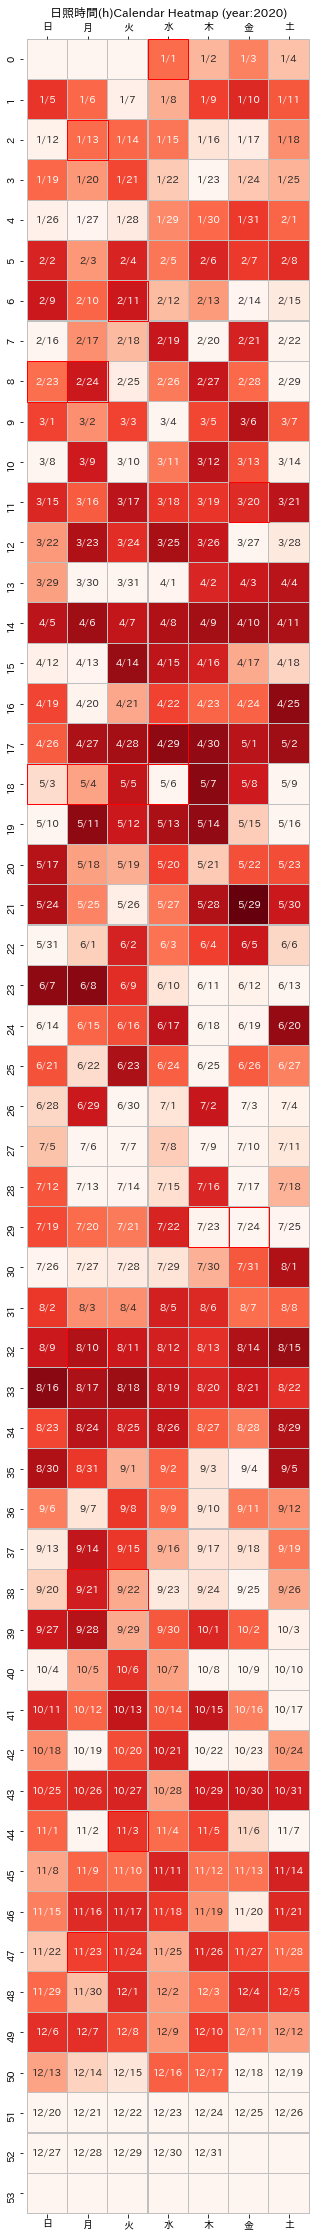

In [33]:
plt.figure(figsize=(10,40))
ax = sns.heatmap(mat, annot=lab, square=True, fmt="", cmap=element_colormap, cbar=False, linewidths=0.1, linecolor='silver')
ax.set_xticklabels(["日","月","火","水","木","金","土"])

for holiday in jpholiday.year_holidays(year):
    tmp = holiday[0]
    y,week,how = american_calendar(tmp.year, tmp.month, tmp.day)

    r = patches.Rectangle(xy=(how, week), width=1, height=1, edgecolor='red', fill=False, linewidth=1)
    ax.add_patch(r)

ax.tick_params(right=False, top=True, labelright=False, labeltop=True)
plt.xlim((-0.1,7.1))
plt.title("{0}Calendar Heatmap (year:{1})".format(Header[element],year))
plt.show()